# **Boston Housing Dataset**



---


The **Boston Housing Dataset** is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA , this dataset contains many columns whose analysis may lead to access to some observations or to solve certain problems, and those columns represent some of the basic factors, the change of which may lead to the change of other factors based on the strength of their relationship.





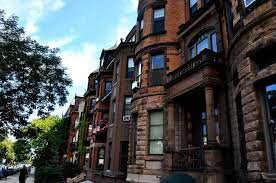

---



###**Prototasks :**
The name for this dataset is simply **boston**.
 It has two prototasks:

*    nox, in which the nitrous oxide level is to be predicted

*     price, in which the median value of a home is to be predicted

##### **our task is to predict the Median value of owner-occupied homes in $1000's (Price).**



## **Dataset**

### **Import Basic Libraries:**


---



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
from sklearn.model_selection import train_test_split
%matplotlib inline
warnings.filterwarnings('ignore')
%matplotlib inline

### **Import Dataset from sklearn :**


---



In [ ]:
#@title
from sklearn.datasets import load_boston
boston = load_boston()
boston_df = pd.DataFrame(boston.data)
boston_df.columns = boston.feature_names
boston_df['PRICE'] = boston.target



###**Show the first five rows:**


---




In [ ]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


###**Show the last five rows:**


---



In [ ]:
boston_df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9



### **Variables in order:**


---


 **CRIM :**     per capita crime rate by town

 **ZN :**       proportion of residential land zoned for lots over 25,000 sq.ft.

 **INDUS :**    proportion of non-retail business acres per town

 **CHAS :**     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

 **NOX :**      nitric oxides concentration (parts per 10 million)

 **RM :**       average number of rooms per dwelling

 **AGE :**      proportion of owner-occupied units built prior to 1940

 **DIS :**      weighted distances to five Boston employment centres

 **RAD :**      index of accessibility to radial highways

 **TAX :**      full-value property-tax rate per 10,000

 **PTRATIO :**  pupil-teacher ratio by town

 **B :**        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

 **LSTAT :**     lower status of the population

 **PRICE :**     Median value of owner-occupied homes in $1000's


---



Since the dataset is available on **sklearn.datasets** , we can display information and description about it through key **DESCR** .


In [ ]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu



---
when looking for the **PRICE** column we found the data is continuous and the  output variable is a real-value, such as an integer or floating point value ,from here we know that the data is **Regression problem** requires the prediction of a quantity and becouse it has multiple input variables is often called a **multivariate regression problem**.

---

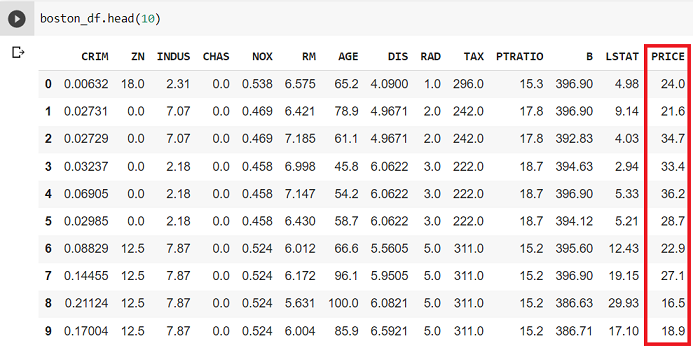

The **shapes** of the dataset (We found when printing the shapes of the dataset it contains **506 rows** and **14 columns**).



In [ ]:
boston_df.shape

(506, 14)

###**Statistical Description of Dataset**


---



In [ ]:
boston_df.describe().T #Statistical Description of Dataset

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


###**Specifies number of samples and features**


---





In [ ]:
m,n=boston_df.shape
print(f'Dataset hase {m} samples , each with {n-1} features')

Dataset hase 506 samples , each with 13 features


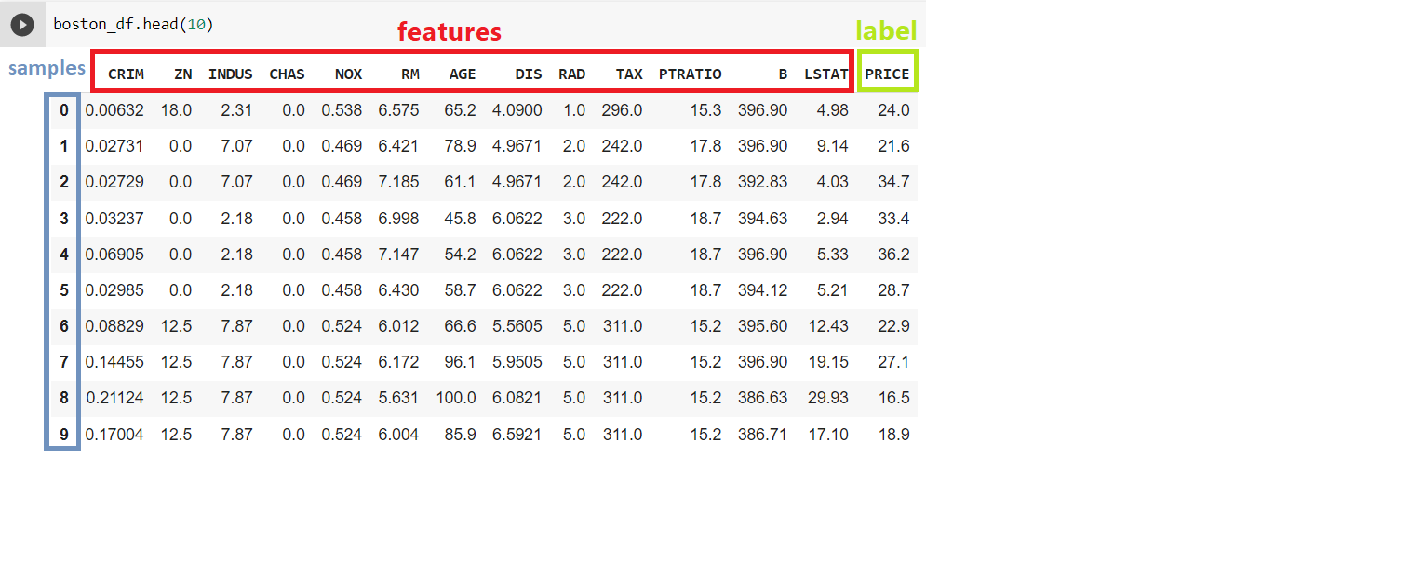

## **Exploratory Data Analysis**


---



#### **Plot relationship between features and label**


---





From the below scatter plots we can observe a lot of positive and negative relationships, such as RM column (which represent average number of rooms) seems to have a positive relation with the price.
Unlike LSTAT (which represent lower status of the population) column seems to have negative impact on the price.


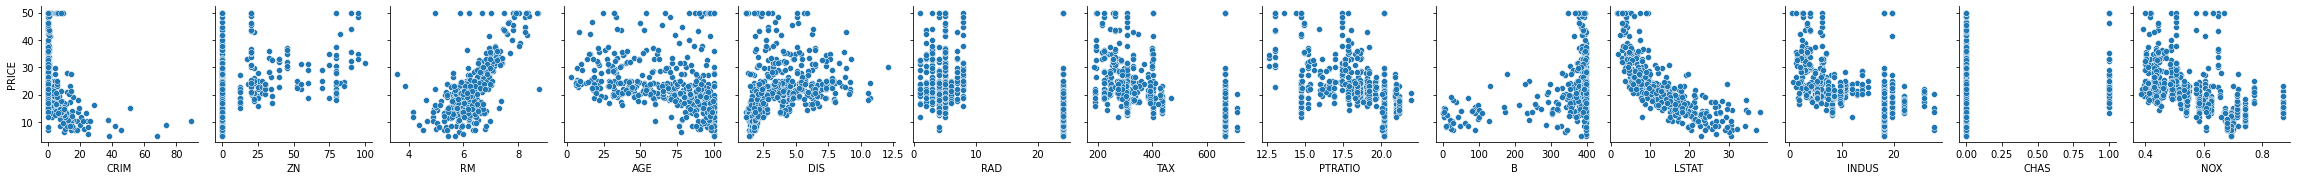

In [ ]:
sns.pairplot(data=boston_df, x_vars=boston_df[['CRIM',	'ZN',	'RM',	'AGE',	'DIS',	'RAD',	'TAX',	'PTRATIO',	'B'	,'LSTAT', 'INDUS',	'CHAS',	'NOX']], y_vars=['PRICE'])

- We can also notice that prices of homes seem to be capped at 50, we will look closer at this weird observation later in "Probability density function" section.

#### **Checking missing values**


---



Null values are not accepted when it comes to build and train a model, so we checked the existence of them and there are **no missing values**!

In [ ]:
boston_df.isnull().sum() # show null values for each attribute

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64




#### **Checking duplicated values**


---



It's important to check if there are any duplicate values or not in order to get accurate outcomes from the model, Fortunately, there are no duplicates in our dataset.

In [ ]:
# checking duplicate values
boston_df.duplicated().sum()

0

#### **Checking and treating outliers in the data**


---

We can determine outliers using boxplot as follows:

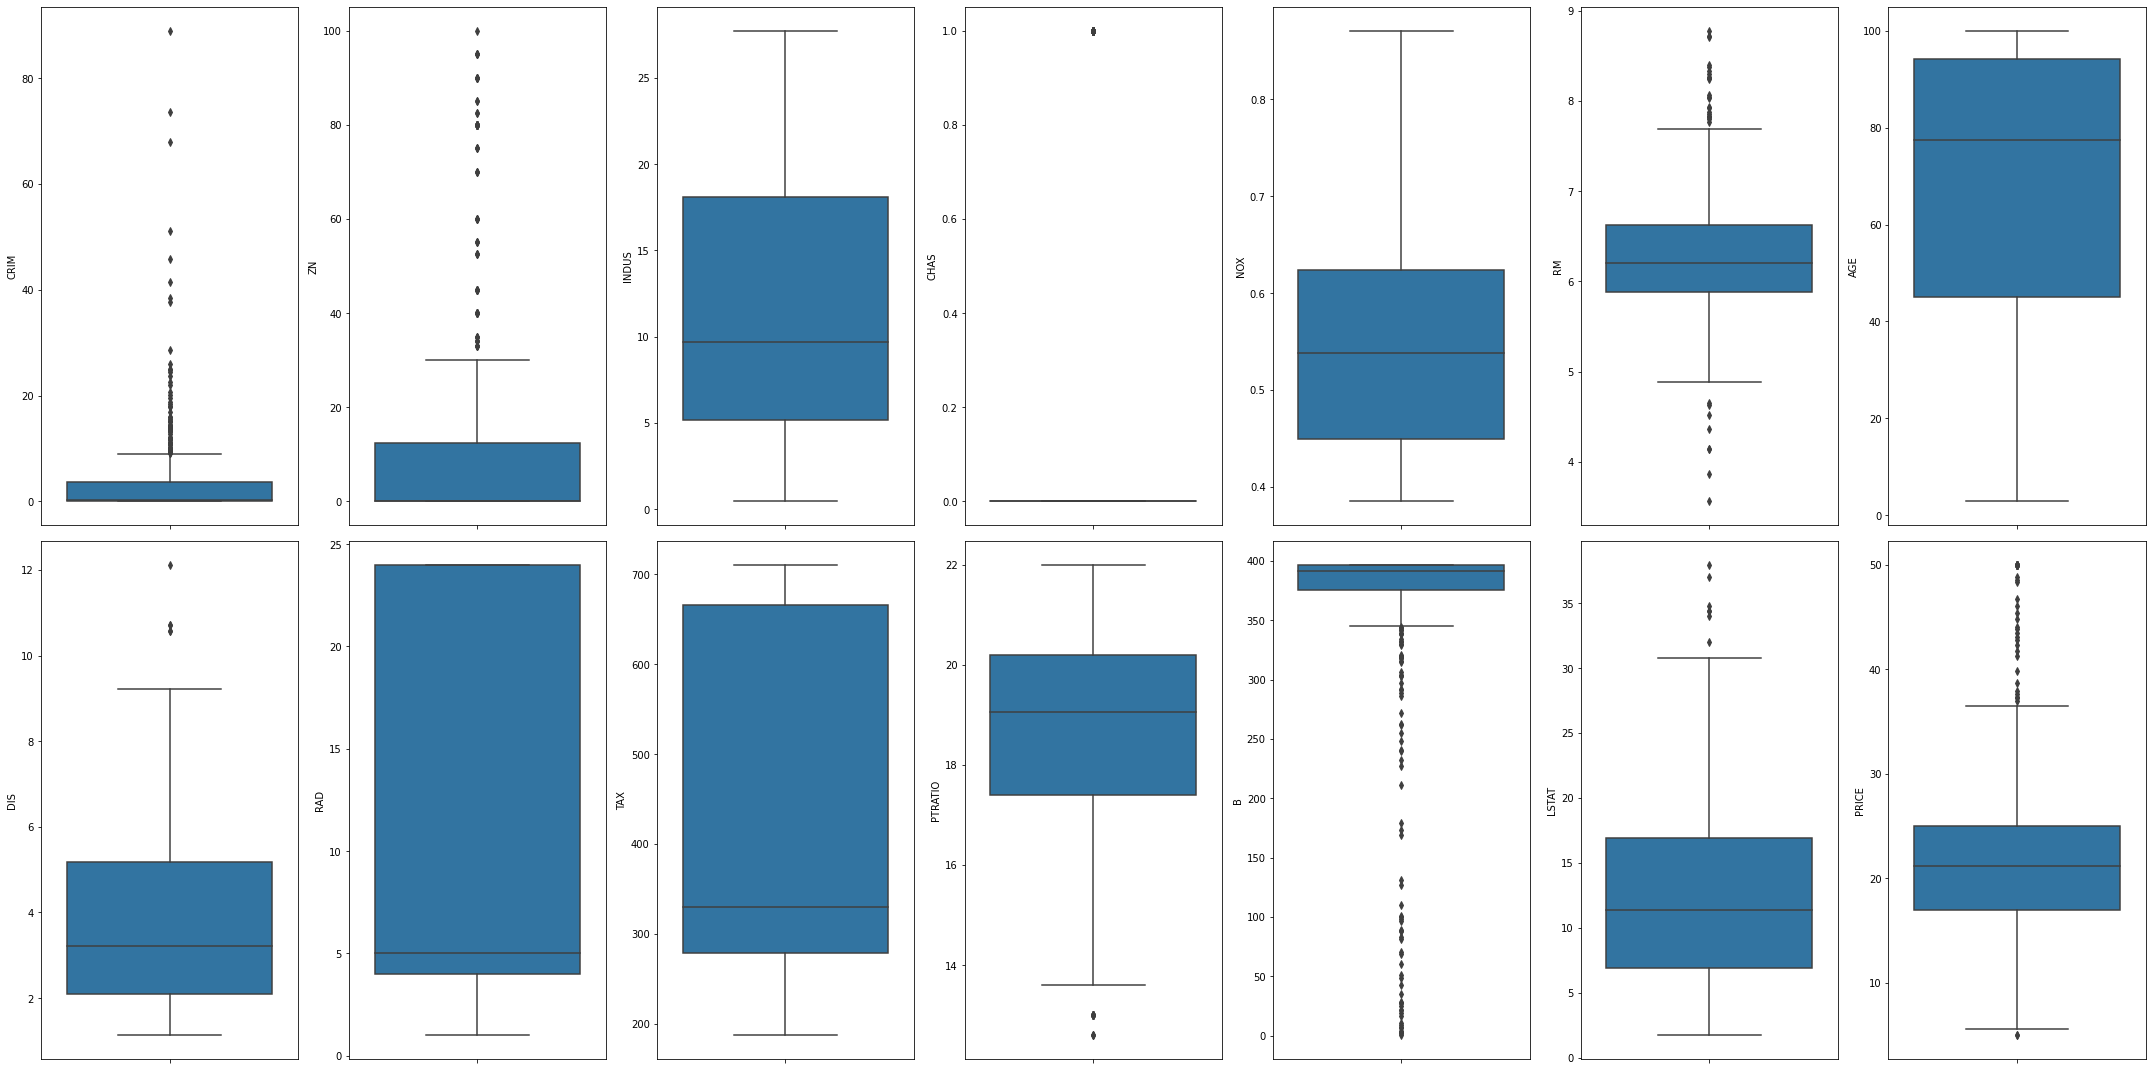

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=7,figsize=(30,15))
i = 0
ax = ax.flatten()
for col, value in boston_df.items(): #14 iterations
  sns.boxplot(data=boston_df, y = col, ax= ax[i])
  i+=1
plt.tight_layout()

Variable 'CRIM', 'ZN' and 'B' have high percentage of outlier data which can adversely affect the accuracy of our model.

To get rid of this we can either drop the observations or replace with some apporach like mean or median. But dropping all the outlier observations is not a good idea as we will be left with very fewer observations due to higher percentage of outliers to train our model on, also if we replace such a big percentage of the outliers with some approach (mean, median...etc.) then it might result into less accurate or biased model.

In [ ]:
for key , value in boston_df.items():
    qua1 = value.quantile(0.25)
    qua3 = value.quantile(0.75)
    iqr = qua3 - qua1
    value_col = value[(value <= qua1 - 1.5 * iqr) | (value >= qua3 + 1.5 * iqr)]
    percentage = np.shape(value_col)[0] * 100.0 / np.shape(boston_df)[0]
    print("Column %s outliers = %.2f%%" % (key, percentage))

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column PRICE outliers = 7.91%


#### **Probability density function (PDF)**


---



When dealing with a set of data, often the first thing to do is get a sense for how the variables are distributed. The most convenient way to take a quick look at a distribution is a histogram (seaborn's distplot also visualizes kernel density estimation for our convenience). Solid vertical line represents mean, dashed - median.

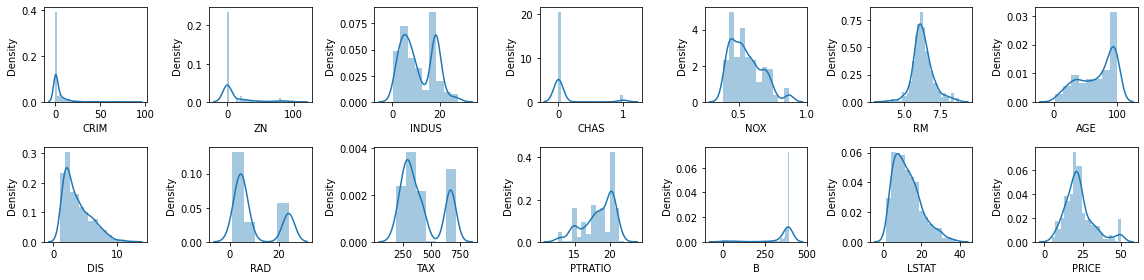

In [ ]:
def PDF(data):

  boston_df_rows_ana = 2
  boston_df_cols_ana = 7
  fig, ax = plt.subplots(nrows = boston_df_rows_ana, ncols=boston_df_cols_ana, figsize = (16,4) )
  col=data.columns
  index = 0

  for i in range(boston_df_rows_ana):
      for j in range(boston_df_cols_ana):
          sns.distplot(data[col[index]],ax = ax[i][j])
          index = index +1

  plt.tight_layout()
PDF(boston_df)

**First observation:** We noticed in the PRICE distribution an unusual increase when it reaches 50,000$, so we plotted a scatter plot to have a better look.

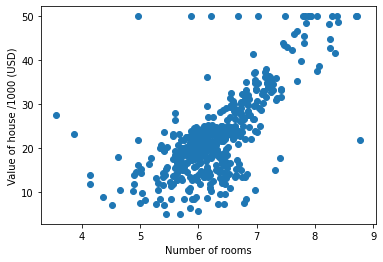

In [ ]:
X_rooms = boston_df['RM']
plt.scatter(X_rooms, boston_df['PRICE'])
plt.ylabel('Value of house /1000 (USD)')
plt.xlabel('Number of rooms')
plt.show()

From scatter plot of the data, you quickly notice that prices of homes seem to be capped at 50. This is because the Census Service censored the data.

Censoring data means restricting the range of possible values of a variable. In this case, they decided to set the maximum value of the price variable to 50k USD, so no price can go beyond that value.([Source](https://towardsdatascience.com/things-you-didnt-know-about-the-boston-housing-dataset-2e87a6f960e8))

That’s why, when you visualize the data, you see a sort of ceiling that flattens your datapoints at 50. In reality, these prices were probably higher.

So in order to avoid any uncertainty in model results, we removed these points considering them as outliers.

---



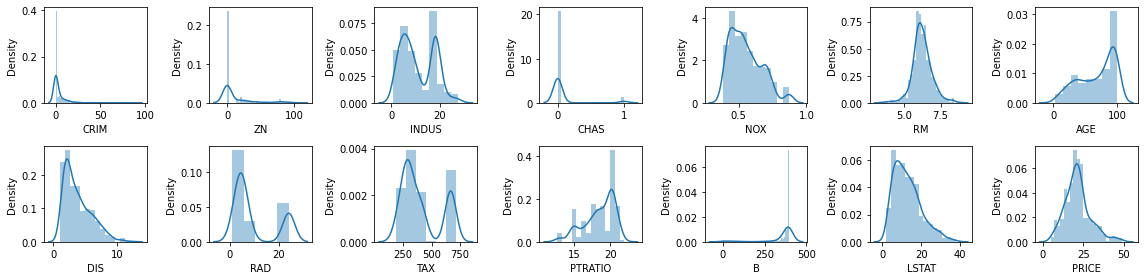

In [ ]:
boston_df_outliers = boston_df[boston_df['PRICE']==50]
boston_df = boston_df.drop(boston_df_outliers.index, axis=0)
PDF(boston_df)

**Second observation:**
- ZN looks like it has many 0s.

**Third observation:**
- `CHAS and RAD` seems to be catigorical, thus they aren't normally distrbuted.
- `CRIM, ZN, INDUS, DIS, PTRATIO, NOX, LSTAT, AGE, TAX and B` are not normally distributed.
- `RM` is noramally distributed.

We recommend using logarithmic transformation to transform data to normal distribution to have better understanding of relationship between independet and dependet feature. ([logarithmic transformation](https://medium.com/@kyawsawhtoon/log-transformation-purpose-and-interpretation-9444b4b049c9))

---

In [ ]:
'''features = ['CRIM', 'ZN', 'INDUS', 'NOX', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']
for feature in features:
    boston_df[feature]=np.log(boston_df[feature])

PDF(boston_df)'''

"features = ['CRIM', 'ZN', 'INDUS', 'NOX', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']\nfor feature in features:\n    boston_df[feature]=np.log(boston_df[feature])\n\nPDF(boston_df)"

#### **Correlation between columns**


---



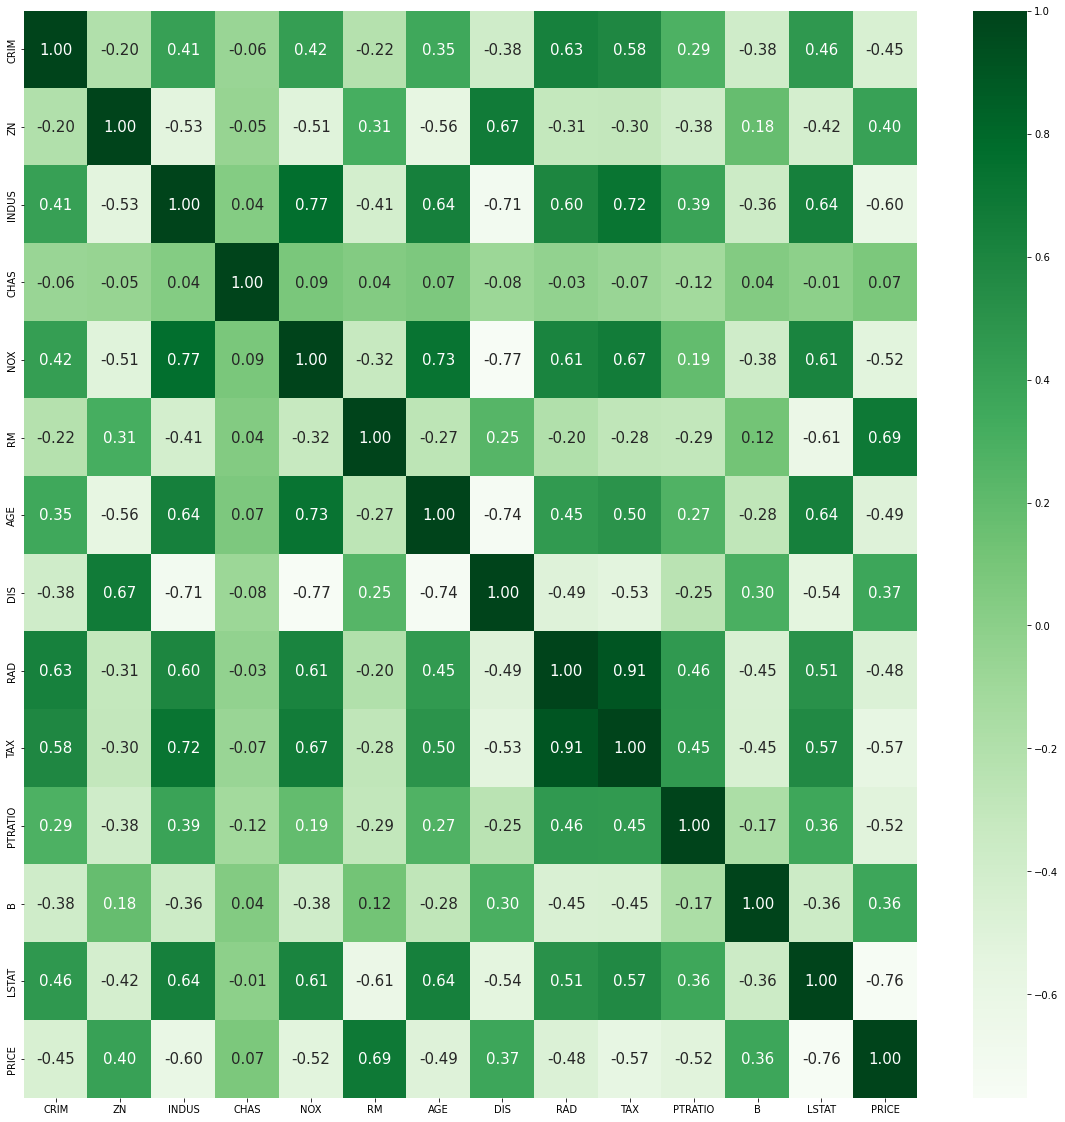

In [ ]:
corr = boston_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, fmt='.2f', annot=True, annot_kws={'size':15}, cmap='Greens')

- So from above correlation matrix we identify that PRICE feature more correlatd with INDUS, NOX, TAX, PTRATIO, LSTAT, RM features


### **Data Featuring**
Now we choose different features and check which one is better for price prediction


---



Define function that return Correlated Features based on given threshold

In [ ]:
def getCorrelatedFeatures(corrdata, threshold):
    boston_df_features = []
    boston_df_value = []
    for i,index in enumerate(corrdata.index):
        if abs(corrdata[index])>threshold:
            boston_df_features.append(index)
            boston_df_value.append(corrdata[index])

    df = pd.DataFrame(data = boston_df_value, index = boston_df_features,columns = ['CorrValue'] )
    return df

Get Correlated Features (more than **0.5** correlation with the target)

In [ ]:
threshold = 0.5
boston_df_corr = boston_df.corr()
corr_value = getCorrelatedFeatures(boston_df_corr['PRICE'],threshold)
print(corr_value)

         CorrValue
INDUS    -0.600005
NOX      -0.524451
RM        0.686634
TAX      -0.572442
PTRATIO  -0.518641
LSTAT    -0.759837
PRICE     1.000000


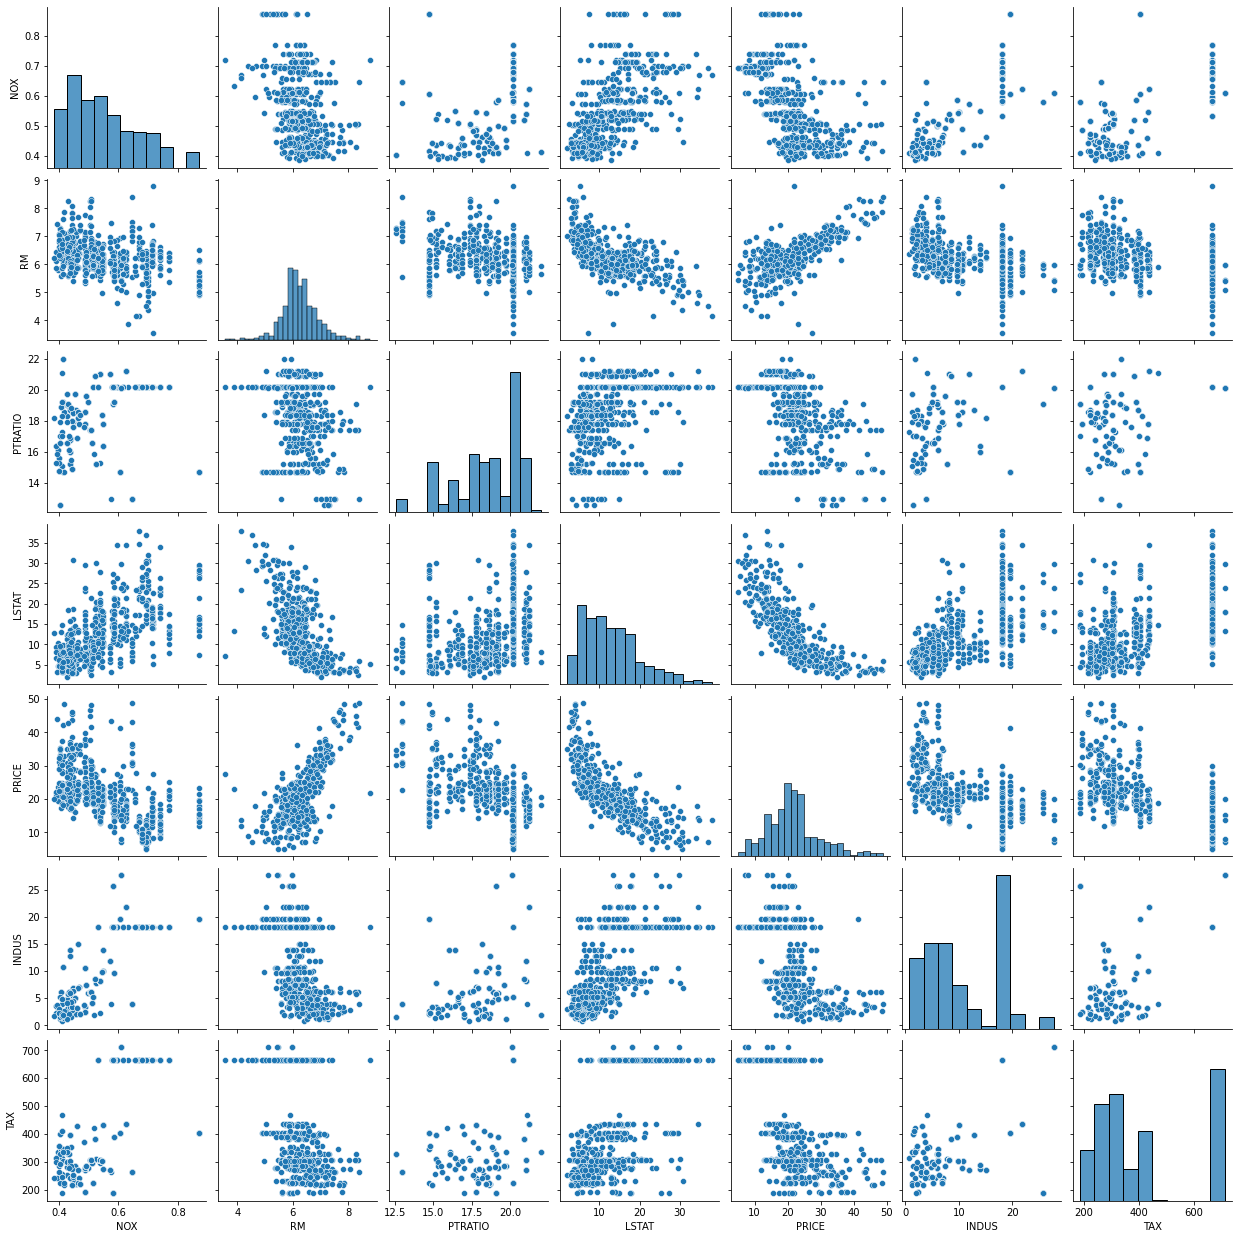

In [ ]:
boston_df_multi = boston_df[['NOX', 'RM' ,'PTRATIO','LSTAT','PRICE', 'INDUS', 'TAX']]
sns.pairplot(boston_df_multi)

### **Encode the outcome to a one-hot vector**



---


To know the data type of columns we use **dtypes** and then find that the dataset has **numerical** (float64) data .


---



In [ ]:
boston_df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

In [ ]:
boston_df.nunique() #Get unique values in each attribute

CRIM       489
ZN          26
INDUS       74
CHAS         2
NOX         80
RM         431
AGE        350
DIS        398
RAD          9
TAX         64
PTRATIO     44
B          342
LSTAT      442
PRICE      228
dtype: int64

After our understanding of the dataset and studying it extensively, and observing the contents of each variables, we found that **RAD variable**, although it is of a numeric , when observing the values ​​inside it, we notice that there is a group of sampels that share the same value from a variable, and therefore we note that that RAD variables is **categorical variable** (the values don't necessarily represent a number but perhaps a ranking).

So that we encode the RAD variable to a **one-hot vector**.


In [ ]:
boston_df.RAD.value_counts()

24.0    127
5.0     109
4.0     108
3.0      37
6.0      26
2.0      24
8.0      23
1.0      19
7.0      17
Name: RAD, dtype: int64

In [ ]:
#representing it as categorical variable
#boston_df["RAD"]=boston_df["RAD"].astype("category")
#datatype of the boston_df
boston_df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

now using **boston_df.get_dummies() :**

 it will drop the original column also this method will automatically pick the categorical variable and apply 1-hot encoding

In [ ]:
#boston_df=pd.get_dummies(boston_df,prefix="RAD")
#from sklearn import preprocessing
#le = preprocessing.LabelEncoder()
#boston_df['RAD'] = le.fit_transform(boston_df['RAD'])

* ### **Note**

When we explored and understood the data more, **RAD was  ordinal - categorical**, which means that the increase in value is important and refers to a specific thing ( **"larger index denotes better accessibility"**).          
Therefore, because we do not want the data to lose its value, we excluded one hot encode, because the presence of ranking is important in this case, and if we do one hot encode, the data will lose its value, and all values ​​are treated the same and holding the same meaning.

###**Dividing Data into Features and Labels**

In [ ]:
Features = boston_df.drop(['PRICE'], axis=1)
target = boston_df['PRICE']